## $\color{royalblue}{\text{ Prva vježba iz NMA (Numeričke metode u astronomiji), datum: 14.10.2024.}} $

### Uvodimo potrebne biblioteke.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import sympy as sym
import time

### $\color{magenta}{\text{1. METODA TETIVA.}} $

### Figuriše nam jednačina $P(x)=0$. Tražimo vrijednosti (a, b) za koje
### će biti zadovoljen uslov $P(a)\cdot P(b)<0$. Jedinstvenost rješenja je
### garantovana ako je funkcija monotona na intervalu $[a,\,b]$, tj. ako je
### $P'(x)>0$ ili $P'(x)<0$ na cijelom intervalu.

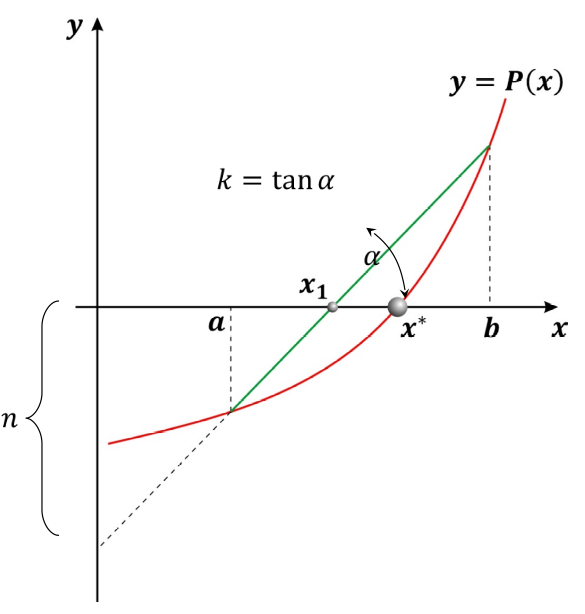

### Na slici iznad, jednačina prave ima oblik $y=kx+n$, a važe i 
### jednakosti $P(a)=P_a=ka+n$; $P(b)=P_b=kb+n$. Kombinacijom, 
### dobijamo jednačinu $x_1=a-\frac{P_a(b-a)}{P_b-P_a}$.
### Ako je $P(x_1)<0$, onda se analizira interval $[x_1,b]$, a ako je
### $P(x_1)>0$, onda se analizira interval $[a,x_1]$.
### Vrijednosti $a$ i $b$ se ažuriraju na osnovu gorepomenutih uslova.

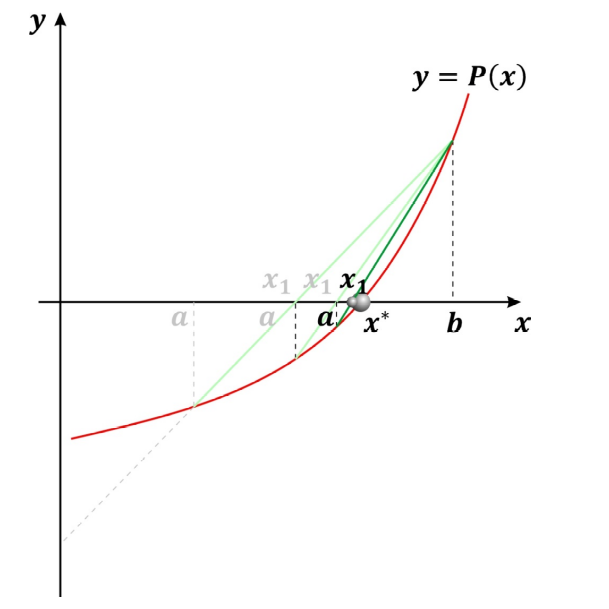

### Posmatramo funkciju $f(x)=\log{x}-\cos{x}+x^{3/4}-x$, za koju želimo
### naći korijen pomoću metode tetiva.
### Definišemo početne vrijednosti i parametre za petlju. 
### Tačnost određuje uslov kada se iteracija zaustavlja, tj. 
### kad je apsolutna razlika $\delta$ manja od ove tačnosti.

vrijeme izracunavanja: 0.019290685653686523s
broj iteracija: 8
rjesenje jednacine: 1.3616923014792979


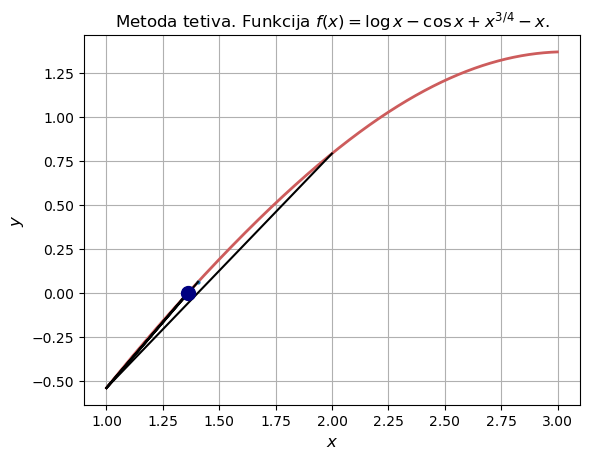

In [23]:
x = np.arange(1, 3, step = 1e-3)
# x = np.linspace(1, 10, 1000)
f = np.log(x) - np.cos(x) + x**(3/4) - x

plt.plot(x, f, color='indianred', linewidth=2)
plt.title(r'Metoda tetiva. Funkcija $f(x)=\log{x}-\cos{x}+x^{3/4}-x$.')
plt.xlabel(r'$x$', fontsize=12, fontweight='bold')
plt.ylabel(r'$y$', fontsize=12, fontweight='bold')
plt.grid()

a = 1
b = 2
tacnost = 1e-8
delta = 2 * tacnost
broj_iteracija = 0
pocetak = time.time()

while abs(delta) > tacnost:
    broj_iteracija += 1
    Pa = np.log(a) - np.cos(a) + a**(3/4) - a
    Pb = np.log(b) - np.cos(b) + b**(3/4) - b
    plt.plot([a, b], [Pa, Pb], color='black')
    
    x1 = a - Pa * (b - a) / (Pb - Pa)  # Središnja tačka između a i b
    Px1 = np.log(x1) - np.cos(x1) + x1**(3/4) - x1
    
    if Px1 < 0:
        delta = np.abs(x1 - a)
        a = x1
    else:
        delta = np.abs(x1 - b)
        b = x1
        
    plt.plot(x1, Px1, 'o', markersize=2)

vrijeme_tetive = time.time()-pocetak
broj_tetive = broj_iteracija 

print('vrijeme izracunavanja: {}s'.format(vrijeme_tetive))        
print('broj iteracija: {}'.format(broj_tetive))
print('rjesenje jednacine: {}'.format(x1))

plt.plot(x1, Px1, 'o', color='navy', markersize = 10)
plt.show()

### $\color{magenta}{\text{2. NjUTNOVA METODA.}} $

### Figuriše nam jednačina $f(x)=0$. Početni pokušaj nam daje $x_0$.
### Analitička interpretacija metode je $f(x)\approx f(x_0)+f'(x_0)(x-x_0)$.
### Ako hoćemo da je $f(x)=0$, onda slijedi $0=f(x_0)+f'(x_0)(x-x_0)$, odakle je
### $x=x_0-\frac{f(x_0)}{f'(x_0)}$.
### Drugi pokušaj će biti dat jednakošću $x_1=x_0-\frac{f(x_0)}{f'(x_0)}$, dok je
### treći pokušaj dat kao $x_2=x_1-\frac{f(x_1)}{f'(x_1)}$. Nastavimo li dalje, 
### dobijamo n-ti pokušaj kao $x_n=x_{n-1}-\frac{f(x_{n-1})}{f'(x_{n-1})}$

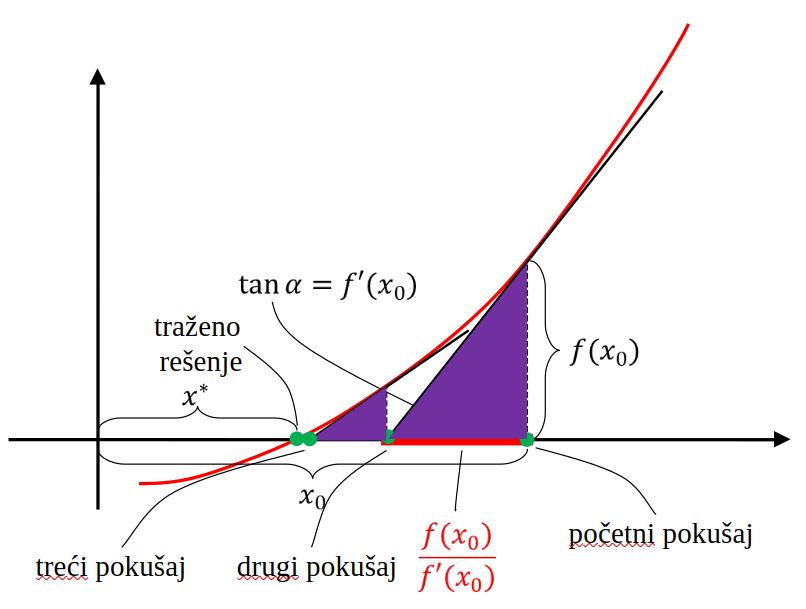

### Rješenje je određeno dovoljno precizno za $|x_n-x_{n-1}|<\varepsilon$, ili 
### drukčije zapisano kao $\big|\frac{f(x_{n-1})}{f'(x_{n-1})}\big|<\varepsilon$.

### Ponovo radimo sa funkcijom $f(x)=\log{x}-\cos{x}+x^{3/4}-x$.

vrijeme izracunavanja: 0.0005936622619628906s
broj_iteracija: 4
rjesenje jednacine: 1.3616923013793187


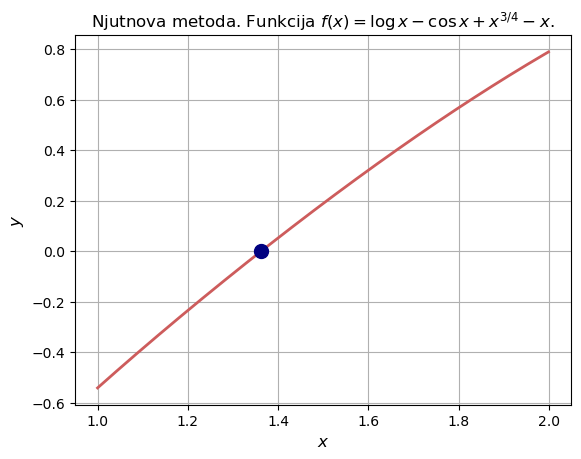

In [22]:
def func(x1):
    return np.log(x1) - np.cos(x1) + x1 ** (3/4) - x1

def funcprim(x1):
    return 1/x1 + np.sin(x1) + 3/4 * x1 ** (-1/4) - 1

x = np.arange(1, 2, 1e-3)
f = np.log(x) - np.cos(x) + x ** (3/4) - x

plt.plot(x, f, color='indianred', linewidth=2)
plt.title(r'Njutnova metoda. Funkcija $f(x)=\log{x}-\cos{x}+x^{3/4}-x$.')
plt.xlabel(r'$x$', fontsize=12, fontweight='bold')
plt.ylabel(r'$y$', fontsize=12, fontweight='bold')
plt.grid()

x1 = 1
tacnost = 1e-8
delta = 2 * tacnost
broj_iteracija = 0
pocetak = time.time()
while abs(delta) > tacnost:
    broj_iteracija += 1
    f = func(x1)
    fprim = funcprim(x1)
    delta = f/fprim
    x1 = x1 - delta
    
vrijeme_njutn = time.time() - pocetak
broj_njutn = broj_iteracija 

print('vrijeme izracunavanja: {}s'.format(vrijeme_njutn))
print('broj_iteracija: {}'.format(broj_iteracija))
print('rjesenje jednacine: {}'.format(x1))

plt.plot(x1, f, 'o', color='navy', markersize=10)
plt.show()

### $\color{magenta}{\text{4. UPOREĐIVANJE METODA: tetive vs Njutn}} $

In [30]:
print('Odnos vremena izračunavanja, Metoda tetive / Njutnova metoda:', vrijeme_tetive/vrijeme_njutn)
print('Broj iteracija za metodu tetiva je', broj_tetive)
print('Broj iteracija za Njutnovu metodu je', broj_njutn)

Odnos vremena izračunavanja, Metoda tetive / Njutnova metoda: 32.49437751004016
Broj iteracija za metodu tetiva je 8
Broj iteracija za Njutnovu metodu je 4


### $\color{magenta}{\text{5. PRIMJENA: Plankov zakon.}} $

### Plankov zakon predstavlja opis raspodjele elektromagnetnog zračenja 
### koje emituje crno tijelo u zavisnosti od talasne dužine i temperature,
### a dat je u obliku: $I(\lambda, T) = \frac{2hc²}{\lambda⁵}\frac{1}{e^{\frac{hc}{\lambda kT}}-1}$.
### Naš zadatak je da odredimo talasnu dužinu na kojoj Sunce zrači $10\frac{kW}{m²nm}$.


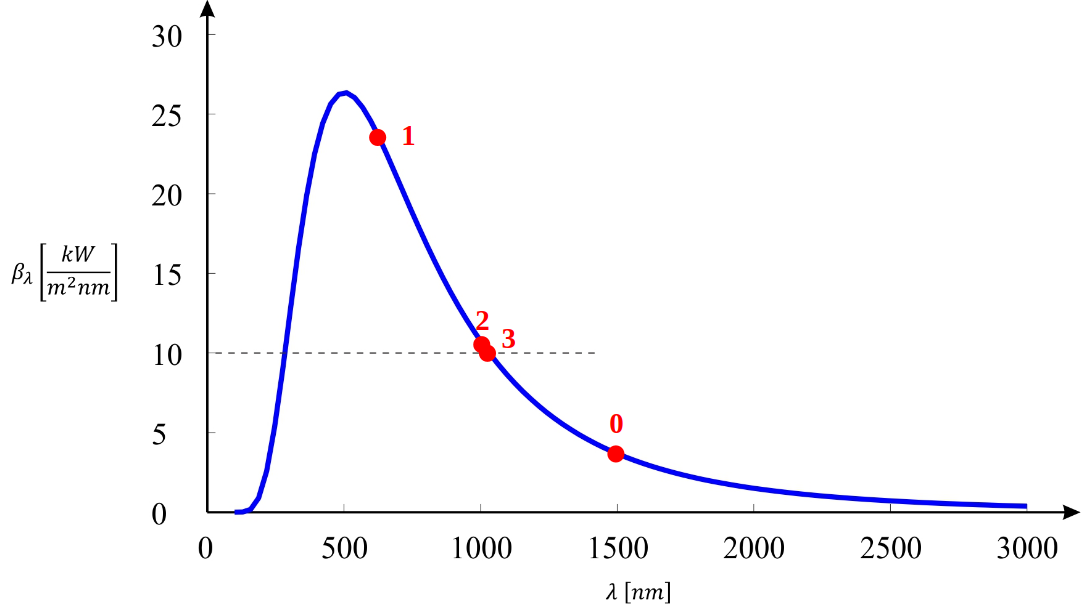

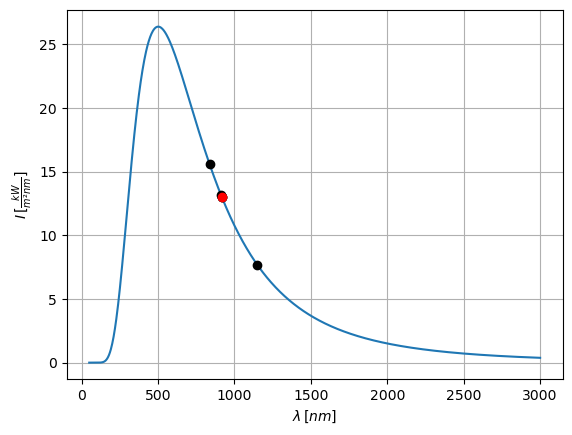

Tražena talasna dužina je 917.557845093430 nm
Broj iteracija je 5


In [32]:
# Konstante koje figurišu u jednačini

c = 299792458.  # brzina svijetlosti [m/s]
h = 6.62607004e-34  # Plankova konstanta [Js]
e = np.exp(1) 
k = 1.38064852e-23  # Bolcmanova konstanta [J/K]
t = 5778.0  # temperatura Sunca [K]


l = sym.Symbol('l') # talasna dužina (simbolička promjenjiva)
f = 2 * h * c**2 / l**5 / (sym.exp(h * c / (l * k * t)) - 1) # Plankov zakon
f1 = sym.diff(f, l) # Izvod po simboličkoj promjenjivoj

l_num = np.linspace(50e-9, 3000e-9, 1000) # numeričke vrijednosti [m]
f_num = np.zeros_like(l_num)

# Računanje Plankovog zakona za svaku talasnu dužinu

for p in range(0, len(l_num)):
    f_num[p] = f.subs(l, l_num[p])  # simbolički izraz -> numerički izraz

plt.plot(1e9 * l_num, f_num * 1e-12)  # konverzija jedinica u nm i kW/m²/nm
plt.ylabel(r'$I\,[\frac{kW}{m²nm}]$')
plt.xlabel(r'$\lambda\,[nm]$')
plt.grid()

###########################################################################################################

tacnost = 1e-12 
delta = 2 * tacnost
l_trazeno = 1150e-9  # inicijalna talasna dužina [m]
f_trazeno = 13e12  # tražena vrijednost u W/m²/m (osnovne jedinice)

broj_iteracija = 0
while np.abs(delta) > tacnost:
    broj_iteracija += 1
    
    # Njutnov metod
    ff = f.subs(l, l_trazeno) - f_trazeno
    fprim = f1.subs(l, l_trazeno)
    delta = ff / fprim
    
    # Prikaz svake iteracije
    plt.plot(1e9 * l_trazeno, (ff + f_trazeno) * 1e-12, 'ok')  # plot svake tačke iteracije

    l_trazeno = l_trazeno - delta  # ažuriranje tražene vrednosti

# Završno plotovanje konačne tačke
plt.plot(1e9 * l_trazeno, (ff + f_trazeno) * 1e-12, 'or')
plt.show()

print('Tražena talasna dužina je', l_trazeno * 1e9, 'nm')
print('Broj iteracija je', broj_iteracija)

### $\color{magenta}{\text{6. PRIMJENA: Maksvelova raspodjela po brzinama.}} $
### Maksvelova raspodjela predstavlja se formulom:
### $p(v)=4\pi v²\big(\frac{m}{2\pi k T}\big)^{3/2}e^{\frac{-mv²}{2kT}}$. Naš zadatak je ispod. 
### Prilikom kretanja molekula kiseonika na apsolutnoj temperaturi od $200\,K$,
### treba odrediti koja brzina molekula ima vjerovatnocu od $0.002$.

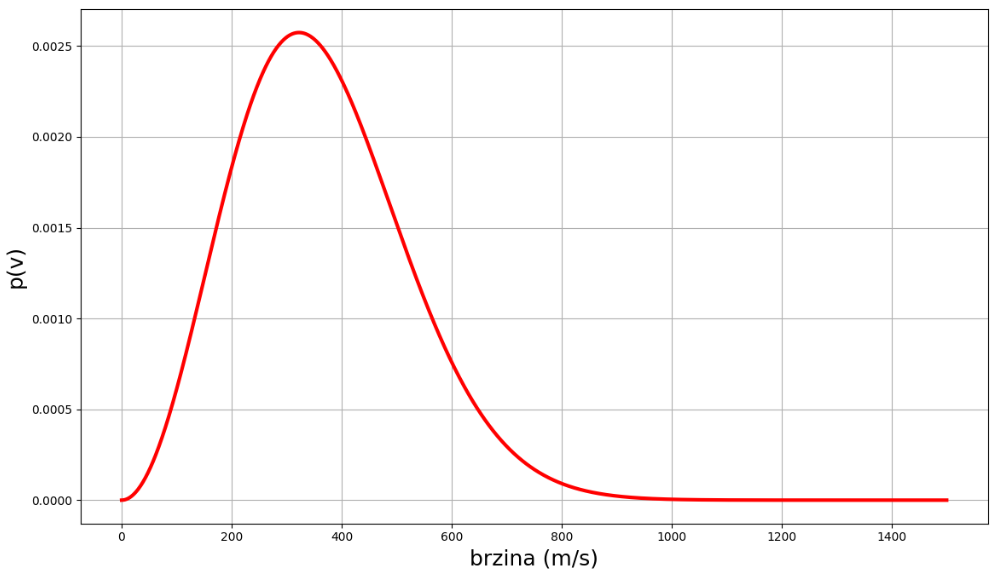

Tražena brzina je 443.115271872290 m/s
Broj iteracija je 5


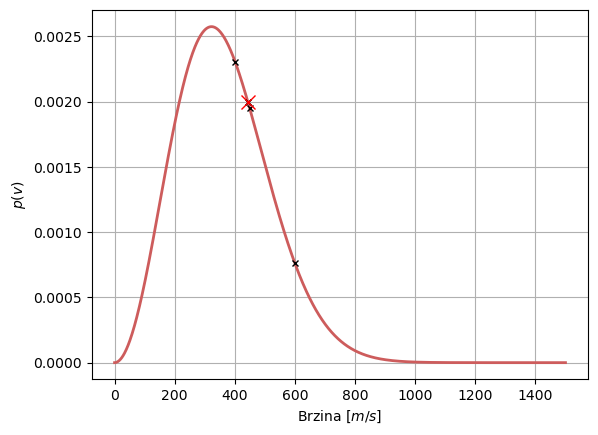

In [42]:
# Konstante koje figurišu u jednačini

c = 299792458.
h = 6.62607004e-34
e = np.exp(1)

t = 200. # apsolutna temperatura [K]
m = 5.31e-26 # masa molekula kiseonika [kg]
k = 1.38064852e-23 # Bolcmanova konstanta [J/K]

v_trazeno = 600 # inicijalni pokusaj
p_trazeno = 0.002 # trazena vrijednost u osnovnim jedinicama

v = sym.Symbol('v') # brzina (simbolička promjenjiva)
p = 4 * np.pi * v**2 * (m / 2 / np.pi / k / t)**(3 / 2) * sym.exp(-m * v**2 / 2 / k / t) # Maksvelova r.
p1=sym.diff(p,v) # Izvod po simboličkoj promjenjivoj

v_num=np.linspace(0, 1500, 1000) # numeričke vrijednosti
p_num=np.zeros_like(v_num)

for k in range(0,len(v_num)):

    p_num[k]=p.subs(v,v_num[k]) # simbolički izraz -> numerički izraz
    
plt.plot(v_num,p_num, color = 'indianred', linewidth=2) # konverzija jedinica u nm i kW/m**2/nm
plt.xlabel(r'Brzina $[m/s]$')
plt.ylabel(r'$p(v)$')
plt.grid()


tacnost = 1e-4
delta = 2 * tacnost
broj_iteracija=0

while np.abs(delta) > tacnost:
    broj_iteracija += 1

    pp = p.subs(v,v_trazeno)-p_trazeno
    pprim = p1.subs(v,v_trazeno)
    delta = pp / pprim
    plt.plot(v_trazeno,(pp+p_trazeno), 'x', color='black', markersize=5) # konverzija jedinica u nm i kW/m**2/nm
    v_trazeno=v_trazeno-delta
    
    
plt.plot(v_trazeno,(pp+p_trazeno), 'x', color='red', markersize=10) # konverzija jedinica u nm i kW/m**2/nm

print('Tražena brzina je', v_trazeno, 'm/s')
print('Broj iteracija je', broj_iteracija)